In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter 
import cv2
import os
import time
from scipy.linalg import logm, expm
from tqdm import tqdm
import math

def pltShowImg(image):
    ch = len(np.shape(image))
    fig = plt.figure(dpi=100)
    if ch==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.xticks([]), plt.yticks([]) 
        plt.axis('off')
        plt.gcf().canvas.draw()
    elif ch==2:
        plt.imshow(image)
        plt.xticks([]), plt.yticks([]) 
        plt.axis('off')
        plt.gcf().canvas.draw()
    else:
        print('Unsuported image size')
        raise
        
def num_of_img_files_in_folder(idir):
    list = os.listdir(idir) # dir is your directory path
    number_files = len(list)
    return number_files

In [167]:
def detect_blur_fft(image, size=60, thresh=0.5, vis=False):
    # grab the dimensions of the image and use the dimensions to
    # derive the center (x, y)-coordinates
    (h, w) = image.shape
    (cX, cY) = (int(w / 2.0), int(h / 2.0))
    # compute the FFT to find the frequency transform, then shift
    # the zero frequency component (i.e., DC component located at
    # the top-left corner) to the center where it will be more
    # easy to analyze
    fft = np.fft.fft2(image)
    fftShift = np.fft.fftshift(fft)
    # check to see if we are visualizing our output
    if vis:
        # compute the magnitude spectrum of the transform
        magnitude = 20 * np.log(np.abs(fftShift))
      
        # display the original input image
        (fig, ax) = plt.subplots(1, 2, dpi=150)
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].set_title("Input")
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        # display the magnitude image
        mag = magnitude
        ax[1].imshow(magnitude)
        ax[1].set_title("Magnitude Spectrum")
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        # show our plots
        plt.show()
    # zero-out the center of the FFT shift (i.e., remove low
    # frequencies), apply the inverse shift such that the DC
    # component once again becomes the top-left, and then apply
    # the inverse FFT
    fftShift[cY - size:cY + size, cX - size:cX + size] = 0
    fftShift = np.fft.ifftshift(fftShift)
    recon = np.fft.ifft2(fftShift)

    # compute the magnitude spectrum of the reconstructed image,
    # then compute the mean of the magnitude values
    magnitude = 20 * np.log(np.abs(recon))
    mean = np.mean(magnitude)
    magnitude = 20 * np.log(np.abs(fftShift))
    # the image will be considered "blurry" if the mean value of the
    # magnitudes is less than the threshold value
    return (mean, mean <= thresh )

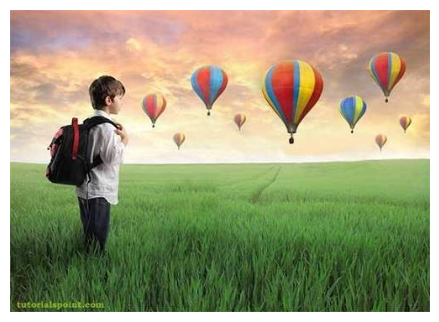

In [168]:
orig = cv2.imread("/home/maneesh/Desktop/Git/DetectBlur/1.jpg")
pltShowImg(orig)

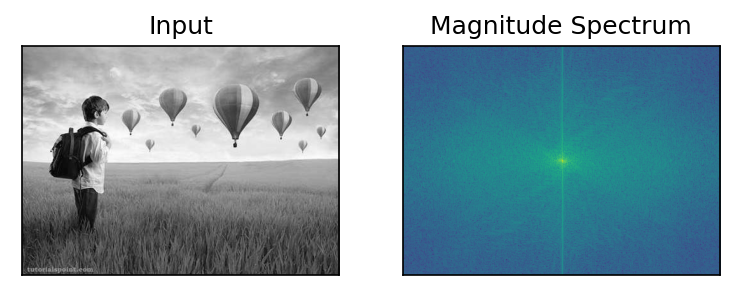

/tmp/ipykernel_122981/1393404282.py:43: RuntimeWarning: divide by zero encountered in log
  magnitude = 20 * np.log(np.abs(fftShift))


ValueError: not enough values to unpack (expected 3, got 2)

In [169]:
k = 1
resultimage = cv2.GaussianBlur(orig, (k, k), 0)
gray = cv2.cvtColor(resultimage, cv2.COLOR_BGR2GRAY)
(mean, blurry, magnitude) = detect_blur_fft(gray, size=60,thresh=10,vis=True)
print(mean)
print("Is the image blurry : ", blurry)

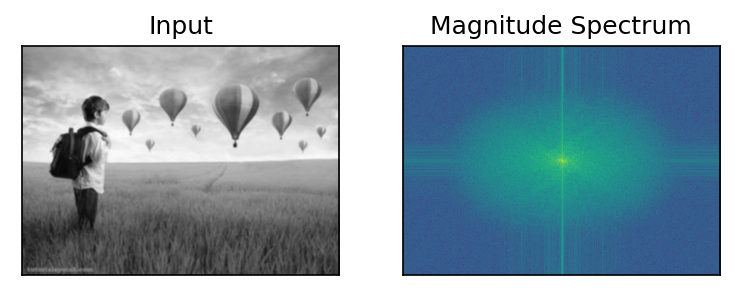

11.846344072358129
Is the image blurry :  False


/tmp/ipykernel_122981/1393404282.py:43: RuntimeWarning: divide by zero encountered in log
  magnitude = 20 * np.log(np.abs(fftShift))


In [171]:
k = 2
resultimage = cv2.GaussianBlur(orig, (2*k+1, 2*k+1), 0)
gray = cv2.cvtColor(resultimage, cv2.COLOR_BGR2GRAY)
(mean, blurry) = detect_blur_fft(gray, size=60,thresh=10,vis=True)
print(mean)
print("Is the image blurry : ", blurry)

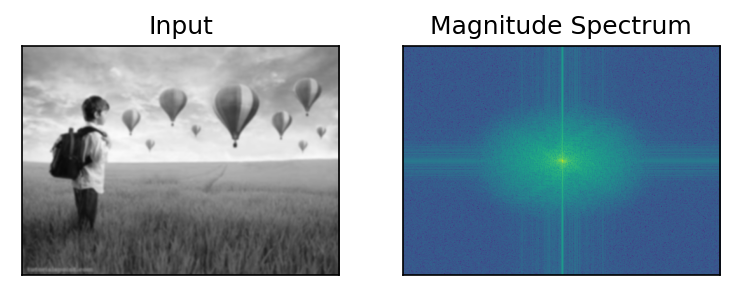

3.8142617332968674
Is the image blurry :  True


/tmp/ipykernel_122981/1393404282.py:43: RuntimeWarning: divide by zero encountered in log
  magnitude = 20 * np.log(np.abs(fftShift))


In [173]:
k = 3
resultimage = cv2.GaussianBlur(orig, (2*k+1, 2*k+1), 0)
gray = cv2.cvtColor(resultimage, cv2.COLOR_BGR2GRAY)
(mean, blurry) = detect_blur_fft(gray, size=60,thresh=10,vis=True)
print(mean)
print("Is the image blurry : ", blurry)

In [174]:
def imageFreqSeperator(idir,odir, OExt = '.jpg', IExt = '.png'):
    N = num_of_img_files_in_folder(idir)
    for i in tqdm(range(1,N+1)):
        Img = cv2.imread(idir + '{:06d}'.format(i)+IExt,cv2.IMREAD_UNCHANGED)
        cv2.imwrite(odir +'{:06d}'.format(i)+OExt, Img)
    return Img

def renamefiles(dir1):
    cwd = os.getcwd()
    files = os.listdir(dir1)
    files = sorted(files)
    n = 1
    N = num_of_img_files_in_folder(dir1)
    D = int(math.log10(N))+1 #digits
    for i, filename in enumerate(files):
         print(dir1 + filename)
         os.rename(dir1 + filename, dir1 + '{:d}'.format(n) + ".jpg")
         #os.rename(dir2 + filename[0:11] + ".jpg", dir2 + '{:06d}'.format(n) + ".jpg")
         n += 1

In [156]:
dir1 = "/home/maneesh/Desktop/Git/DetectBlur/imageTmp/"
#dir1 = "/home/maneesh/Desktop/Syn_Data_Genarate_from_ShipCAD_model/textures/high_frequency/"
renamefiles(dir1)

/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   1.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   2.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   3.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   4.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   5.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   6.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   7.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   8.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/   9.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  10.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  11.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  12.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  13.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  14.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  15.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  16.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  17.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/  18.jpg
/home/mane

/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3070.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3071.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3072.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3073.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3074.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3075.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3076.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3077.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3078.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3079.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3080.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3081.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3082.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3083.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3084.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3085.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3086.jpg
/home/maneesh/Desktop/Git/DetectBlur/imageTmp/3087.jpg
/home/mane

In [192]:
def compareAndCategorizeDatasetByFreq(DirData,DirH,DirL,DirM, HTresh = 20, LTresh = 5):
    N = num_of_img_files_in_folder(DirData)
    for i in tqdm(range(1,N+1)):
        Img = cv2.imread(DirData + '{:d}'.format(i)+".jpg",cv2.IMREAD_UNCHANGED)
        gray = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
        (mean, blurry) = detect_blur_fft(gray, size=60,thresh=10,vis=False)
        if mean> HTresh:
            cv2.imwrite(DirH +'{:d}'.format(i)+".jpg", Img)
        elif mean< LTresh:
            cv2.imwrite(DirL +'{:d}'.format(i)+".jpg", Img)
        else:
            cv2.imwrite(DirM +'{:d}'.format(i)+".jpg", Img)
    renamefiles(DirH)
    renamefiles(DirL)
    renamefiles(DirM)

In [191]:
DirData = "/home/maneesh/Desktop/Git/DetectBlur/imageTmp/"
DirH = "/home/maneesh/Desktop/Git/DetectBlur/high/"
DirL = "/home/maneesh/Desktop/Git/DetectBlur/low/"
DirM = "/home/maneesh/Desktop/Git/DetectBlur/Mid/"
compareAndCategorizeDatasetByFreq(DirData,DirH,DirL,DirM, HTresh = 25, LTresh = 15)

  0%|                                                  | 0/5594 [00:00<?, ?it/s]/tmp/ipykernel_122981/1393404282.py:43: RuntimeWarning: divide by zero encountered in log
  magnitude = 20 * np.log(np.abs(fftShift))
100%|███████████████████████████████████████| 5594/5594 [03:51<00:00, 24.19it/s]


/home/maneesh/Desktop/Git/DetectBlur/high/1.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/10.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/100.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1000.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1001.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1002.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1003.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1004.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1005.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1006.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1007.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1008.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1009.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1010.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1011.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1012.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1013.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1014.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/1015.jpg
/home/maneesh/Desktop/Git/DetectBlur/

/home/maneesh/Desktop/Git/DetectBlur/high/5346.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5347.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5348.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5349.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/535.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5350.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5351.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5352.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5353.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5354.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5355.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/536.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5360.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5361.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5362.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5363.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5364.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5365.jpg
/home/maneesh/Desktop/Git/DetectBlur/high/5367.jpg
/home/maneesh/Desktop/Git/DetectB